In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
import os
import time
warnings.filterwarnings('ignore')

## 2.预备知识

### 2.1数据操作
#### 2.1.1入门

In [7]:
x = tf.range(12)
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [17]:
x.shape

TensorShape([12])

In [18]:
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [19]:
tf.reshape(x,(3,4))

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

In [20]:
tf.reshape(x,(-1,4))

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

In [21]:
tf.zeros((3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [22]:
tf.ones((3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [28]:
tf.random.normal(shape=(3,4),mean=1,stddev=2)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 4.2333584 ,  2.3934479 ,  1.7916293 ,  1.4773493 ],
       [ 2.3849158 , -0.03650892, -0.52580655,  1.3075398 ],
       [ 0.9269049 ,  1.5649221 , -4.1858587 , -2.650894  ]],
      dtype=float32)>

In [30]:
tf.constant([[1.,2]])

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 2.]], dtype=float32)>

#### 2.1.2运算符

In [42]:
a=tf.constant([[1,1,1],[2,1,0]])
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 1, 0]], dtype=int32)>

In [44]:
b=tf.constant([[1,2,4],[3,4,1]])
b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 4],
       [3, 4, 1]], dtype=int32)>

In [47]:
# 按元素运算
a+b,a-b,a*b,a/b

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[2, 3, 5],
        [5, 5, 1]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 0, -1, -3],
        [-1, -3, -1]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 4],
        [6, 4, 0]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=float64, numpy=
 array([[1.        , 0.5       , 0.25      ],
        [0.66666667, 0.25      , 0.        ]])>)

In [49]:
# 很多tf函数要求浮点格式，此int型计算报错
tf.exp(a)

NotFoundError: Could not find valid device for node.
Node:{{node Exp}}
All kernels registered for op Exp :
  device='XLA_GPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='XLA_GPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
  device='GPU'; T in [DT_COMPLEX128]
  device='GPU'; T in [DT_COMPLEX64]
  device='GPU'; T in [DT_DOUBLE]
  device='GPU'; T in [DT_HALF]
  device='GPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_FLOAT]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_BFLOAT16, DT_COMPLEX128, DT_HALF]
 [Op:Exp]

In [52]:
tf.cast(a,'float32')

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [2., 1., 0.]], dtype=float32)>

In [55]:
# 变类型后不报错了
tf.exp(tf.cast(a,'float32'))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[2.7182817, 2.7182817, 2.7182817],
       [7.389056 , 2.7182817, 1.       ]], dtype=float32)>

In [57]:
# axis等于那个位置，那个位置就变多,0=行变多，1=列变多
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 1, 0],
       [1, 2, 4],
       [3, 4, 1]], dtype=int32)>

In [58]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 1, 1, 1, 2, 4],
       [2, 1, 0, 3, 4, 1]], dtype=int32)>

In [59]:
# bool型二元张量
a==b

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True, False, False],
       [False, False, False]])>

In [61]:
# 所有元素累计求和 return 0D标量
tf.reduce_sum(a)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

#### 2.1.3广播机制

In [63]:
a = tf.reshape(tf.range(3),(3,1))
b = tf.reshape(tf.range(2),(1,2))
a,b

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

In [65]:
# 大部分情况下沿着axis=1的轴广播
a+b

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

#### 2.1.4索引和切片

In [67]:
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [69]:
x[0],x[1:4]

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>)

In [71]:
# TensorFlow中的Tensors是不可变的，也不能被赋值。 TensorFlow中的Variables是支持赋值的可变容器

In [80]:
x1 = tf.Variable(tf.range(12))
x1

<tf.Variable 'Variable:0' shape=(12,) dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [81]:
# variable 支持切片赋值 直接改变原变量
x1[0].assign(x1[0]+5)

<tf.Variable 'UnreadVariable' shape=(12,) dtype=int32, numpy=array([ 5,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

In [90]:
# 必须类型一致
# tf.zeros(12,)+tf.zeros(12,dtype='int32') # 报错
tf.zeros(12,dtype='int32')+tf.zeros(12,dtype='int32') # 正确

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [92]:
# 所有元素赋值，
x1.assign_add(tf.cast(tf.ones(12),dtype='int32'))  # ones,zeros函数出来的都是float32型，需转int32

<tf.Variable 'UnreadVariable' shape=(12,) dtype=int32, numpy=array([ 6,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

#### 2.1.5节省内存

In [94]:
# 运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。
# 在下面的例子中，我们用Python的id()函数演示了这一点， 它给我们提供了内存中引用对象的确切地址。 运行Y = Y + X后，
# 我们会发现id(Y)指向另一个位置。 这是因为Python首先计算Y + X，为结果分配新的内存，然后使Y指向内存中的这个新位置。
before = id(a)
a = a + b
id(a) == before

False

In [95]:
# 这可能是不可取的，原因有两个：首先，我们不想总是不必要地分配内存。
# 在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。 
#通常情况下，我们希望原地执行这些更新。 其次，如果我们不原地更新，其他引用仍然会指向旧的内存位置， 
# 这样我们的某些代码可能会无意中引用旧的参数。

# Variables是TensorFlow中的可变容器，它们提供了一种存储模型参数的方法。 
# 我们可以通过assign将一个操作的结果分配给一个Variable。 为了说明这一点，我们创建了一个与另一个张量Y相同的形状的Z，
# 使用zeros_like来分配一个全 0 的块。
c = tf.Variable(tf.zeros_like(a))
print('id(Z):', id(c))
c.assign(a + b)
print('id(Z):', id(c))

id(Z): 139900843145200
id(Z): 139900843145200


In [96]:
# 即使你将状态持久存储在Variable中， 你也可能希望避免为不是模型参数的张量过度分配内存，从而进一步减少内存使用量。

# 由于TensorFlow的Tensors是不可变的，而且梯度不会通过Variable流动， 因此TensorFlow没有提供一种明确的方式来原地运行单个操作。

# 但是，TensorFlow提供了tf.function修饰符， 将计算封装在TensorFlow图中，该图在运行前经过编译和优化。 
# 这允许TensorFlow删除未使用的值，并复用先前分配的且不再需要的值。 这样可以最大限度地减少TensorFlow计算的内存开销。
@tf.function
def computation(X, Y):
    Z = tf.zeros_like(Y)  # 这个未使用的值将被删除
    A = X + Y  # 当不再需要时，分配将被复用
    B = A + Y
    C = B + Y
    return C + Y

computation(a, b)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 5],
       [1, 6],
       [2, 7]], dtype=int32)>

#### 2.1.6转换为其他python对象

In [101]:
a

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

In [102]:
a.numpy()

array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)

In [103]:
tf.constant(a)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

#### 2.1.7小节

* 深度学习存储和操作数据的主要接口是张量（ 𝑛 维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。



#### 2.1.8. 练习
* 运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。
* 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

In [111]:
c

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[0, 2],
       [1, 3],
       [2, 4]], dtype=int32)>

In [112]:
a

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

In [114]:
a<c

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[False,  True],
       [False,  True],
       [False,  True]])>

In [116]:
d = tf.reshape(tf.range(6),(1,2,3))
f = tf.reshape(tf.range(4),(2,2,1))
d,f

(<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
 array([[[0, 1, 2],
         [3, 4, 5]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[0],
         [1]],
 
        [[2],
         [3]]], dtype=int32)>)

In [117]:
d+f

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [4, 5, 6]],

       [[2, 3, 4],
        [6, 7, 8]]], dtype=int32)>

In [119]:
d = tf.reshape(tf.range(6),(1,2,3))
f = tf.reshape(tf.range(4),(2,1,2))
d,f

(<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
 array([[[0, 1, 2],
         [3, 4, 5]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
 array([[[0, 1]],
 
        [[2, 3]]], dtype=int32)>)

In [120]:
d+f

InvalidArgumentError: Incompatible shapes: [1,2,3] vs. [2,1,2] [Op:AddV2]

In [121]:
d = tf.reshape(tf.range(6),(1,2,3))
f = tf.reshape(tf.range(4),(1,2,2))
d+f

InvalidArgumentError: Incompatible shapes: [1,2,3] vs. [1,2,2] [Op:AddV2]

* 可以看出第二个问题，对于3及以上的维度张量的广播机制，必须满足中间的维度是一致的

In [127]:
d = tf.reshape(tf.range(6),(1,2,3,1))
f = tf.reshape(tf.range(12),(1,2,3,2))
d+f

<tf.Tensor: shape=(1, 2, 3, 2), dtype=int32, numpy=
array([[[[ 0,  1],
         [ 3,  4],
         [ 6,  7]],

        [[ 9, 10],
         [12, 13],
         [15, 16]]]], dtype=int32)>

### 2.2数据预处理

#### 2.2.1读取数据集

In [128]:
# 创建数据
os.makedirs(os.path.join('..', 'tf_data'), exist_ok=True)
data_file = os.path.join('..', 'tf_data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名：房间数量、类型、价格
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [129]:
# 读取数据
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


#### 2.2.2处理缺失值

In [131]:
# 注意，“NaN”项代表缺失值。 为了处理缺失的数据，典型的方法包括插值法和删除法，
# 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

# 通过位置索引iloc，我们将data分成inputs和outputs， 其中前者为data的前两列，而后者为data的最后一列。
# 对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。
inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [133]:
pd.get_dummies(inputs,dummy_na=True)

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [135]:
inputs = pd.get_dummies(inputs,dummy_na=True)

#### 2.2.3转为张量
现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式。

In [137]:
x,y = tf.constant(inputs.values),tf.constant(outputs.values)

In [138]:
x,y

(<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>)

### 2.3线性代数

#### 2.3.1标量

标量由只有一个元素的张量表示。 在下面的代码中，我们实例化两个标量，并执行一些熟悉的算术运算，即加法、乘法、除法和指数。

In [140]:
m = tf.constant(3.5)
n = tf.constant(5.)
m+n,m-n,m*n,m/n

(<tf.Tensor: shape=(), dtype=float32, numpy=8.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=17.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>)

#### 2.3.2向量
向量视为标量值组成的列表。例如，如果我们正在训练一个模型来预测贷款违约风险，我们可能会将每个申请人与一个向量相关联， 其分量与其收入、工作年限、过往违约次数和其他因素相对应

In [141]:
tf.range(4)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3], dtype=int32)>

In [142]:
# 我们通过张量的索引来访问任一元素。
tf.range(4)[2]

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [150]:
# 形状
tf.constant(0).shape, tf.constant([0]).shape, tf.constant([[0]]).shape 

(TensorShape([]), TensorShape([1]), TensorShape([1, 1]))

In [151]:
len(tf.constant([[0]]))

1

In [152]:
# 标量没len
len(tf.constant(0))

TypeError: Scalar tensor has no `len()`

#### 2.3.3矩阵

In [153]:
A = tf.reshape(tf.range(20), (5, 4))
A

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]], dtype=int32)>

In [154]:
tf.transpose(A)

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]], dtype=int32)>

#### 2.3.4张量
0D 1D 2D ... nD

#### 2.3.5张量算法本质
* 对相同形状的两个张量按元素运算都不改变形状，e.g.A*B 数学中叫哈达马积
* 将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

#### 2.3.6 降维

我们可以对任意张量进行的一个有用的操作是计算其元素的和。 在数学表示法中，我们使用 ∑ 符号表示求和。 为了表示长度为 𝑑 的向量中元素的总和，可以记为 ∑𝑑𝑖=1𝑥𝑖 。 在代码中，我们可以调用计算求和的函数：

In [157]:
tf.range(4),tf.reduce_sum(tf.range(4))

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=6>)

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），我们可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [160]:
tf.ones((2,4)),tf.reduce_sum(tf.ones((2,4)),axis=0),tf.reduce_sum(tf.ones((2,4)),axis=1)

(<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 2., 2., 2.], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([4., 4.], dtype=float32)>)

#### 非降维求和
但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。

In [162]:
sum_A = tf.reduce_sum(tf.reshape(tf.range(20),(5,4)), axis=1, keepdims=True)
sum_A

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[ 6],
       [22],
       [38],
       [54],
       [70]], dtype=int32)>

例如，由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。

In [163]:
tf.reshape(tf.range(20),(5,4))/sum_A

<tf.Tensor: shape=(5, 4), dtype=float64, numpy=
array([[0.        , 0.16666667, 0.33333333, 0.5       ],
       [0.18181818, 0.22727273, 0.27272727, 0.31818182],
       [0.21052632, 0.23684211, 0.26315789, 0.28947368],
       [0.22222222, 0.24074074, 0.25925926, 0.27777778],
       [0.22857143, 0.24285714, 0.25714286, 0.27142857]])>

如果我们想沿某个轴计算A元素的累积总和， 比如axis=0（按行计算），我们可以调用cumsum函数。 此函数不会沿任何轴降低输入张量的维度。

In [164]:
tf.cumsum(tf.reshape(tf.range(20),(5,4)), axis=0)

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21],
       [24, 28, 32, 36],
       [40, 45, 50, 55]], dtype=int32)>

#### 2.3.7点积

我们已经学习了按元素操作、求和及平均值。 另一个最基本的操作之一是点积。 给定两个向量 𝐱,𝐲∈ℝ𝑑 ， 它们的点积（dot product） 𝐱⊤𝐲  （或 ⟨𝐱,𝐲⟩ ） 是相同位置的按元素乘积的和： 𝐱⊤𝐲=∑𝑑𝑖=1𝑥𝑖𝑦𝑖 。

In [168]:
x = tf.cast(tf.range(4),dtype='float32')
y = tf.ones(4, dtype=tf.float32)
x, y, tf.tensordot(x, y, axes=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

注意，我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积：

In [169]:
tf.reduce_sum(x * y)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

点积在很多场合都很有用。 例如，给定一组由向量 𝐱∈ℝ𝑑 表示的值， 和一组由 𝐰∈ℝ𝑑 表示的权重。  𝐱 中的值根据权重 𝐰 的加权和， 可以表示为点积 𝐱⊤𝐰 。 当权重为非负数且和为1（即 (∑𝑑𝑖=1𝑤𝑖=1) ）时， 点积表示加权平均（weighted average）。 将两个向量规范化得到单位长度后，点积表示它们夹角的余弦。 我们将在本节的后面正式介绍长度（length）的概念。

#### 2.3.8矩阵-向量积

现在我们知道如何计算点积，我们可以开始理解矩阵-向量积（matrix-vector product）。 回顾分别在 (2.3.2)和 (2.3.1)中定义的矩阵 𝐀∈ℝ𝑚×𝑛 和向量 𝐱∈ℝ𝑛 。 让我们将矩阵 𝐀 用它的行向量表示：

(2.3.5)
𝐀=⎡⎣⎢⎢⎢⎢𝐚⊤1𝐚⊤2⋮𝐚⊤𝑚⎤⎦⎥⎥⎥⎥,
 
其中每个 𝐚⊤𝑖∈ℝ𝑛 都是行向量，表示矩阵的第 𝑖 行。 矩阵向量积 𝐀𝐱 是一个长度为 𝑚 的列向量， 其第 𝑖 个元素是点积 𝐚⊤𝑖𝐱 ：

(2.3.6)
𝐀𝐱=⎡⎣⎢⎢⎢⎢𝐚⊤1𝐚⊤2⋮𝐚⊤𝑚⎤⎦⎥⎥⎥⎥𝐱=⎡⎣⎢⎢⎢⎢𝐚⊤1𝐱𝐚⊤2𝐱⋮𝐚⊤𝑚𝐱⎤⎦⎥⎥⎥⎥.
 
我们可以把一个矩阵 𝐀∈ℝ𝑚×𝑛 乘法看作是一个从 ℝ𝑛 到 ℝ𝑚 向量的转换。 这些转换是非常有用的。例如，我们可以用方阵的乘法来表示旋转。 我们将在后续章节中讲到，我们也可以使用矩阵-向量积来描述在给定前一层的值时， 求解神经网络每一层所需的复杂计算。

在代码中使用张量表示矩阵-向量积，我们使用与点积相同的matvec函数。 当我们为矩阵A和向量x调用tf.linalg.matvec(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [171]:
A = tf.cast(tf.reshape(tf.range(20),(5,4)),dtype='float32')
A.shape, x.shape, tf.linalg.matvec(A, x)

(TensorShape([5, 4]),
 TensorShape([4]),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 14.,  38.,  62.,  86., 110.], dtype=float32)>)

#### 2.3.9矩阵-矩阵乘法

我们可以将矩阵-矩阵乘法 𝐀𝐁 看作是简单地执行 𝑚 次矩阵-向量积，并将结果拼接在一起，形成一个 𝑛×𝑚 矩阵。 在下面的代码中，我们在A和B上执行矩阵乘法。 这里的A是一个5行4列的矩阵，B是一个4行3列的矩阵。 两者相乘后，我们得到了一个5行3列的矩阵。

In [172]:
B = tf.ones((4, 3), tf.float32)
tf.matmul(A, B)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]], dtype=float32)>

#### 2.3.10范数
* 线性代数中最有用的一些运算符是范数（norm）。 非正式地说，一个向量的范数告诉我们一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
* 第三个性质简单地说范数必须是非负的: 𝑓(𝐱)≥0. 这是有道理的。因为在大多数情况下，任何东西的最小的大小是0。 最后一个性质要求范数最小为0，当且仅当向量全由0组成。
* 范数听起来很像距离的度量。 如果你还记得欧几里得距离和毕达哥拉斯定理，那么非负性的概念和三角不等式可能会给你一些启发。 事实上，欧几里得距离是一个 𝐿2 范数： 假设 𝑛 维向量 𝐱 中的元素是 𝑥1,…,𝑥𝑛 ，其 𝐿2 范数是向量元素平方和的平方根：

In [173]:
u = tf.constant([3.0, -4.0])
tf.norm(u)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

* 在深度学习中，我们更经常地使用 𝐿2 范数的平方。 你还会经常遇到 𝐿1 范数，它表示为向量元素的绝对值之和：

In [174]:
tf.reduce_sum(tf.abs(u))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

* Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的 𝐿2 范数。 调用以下函数将计算矩阵的Frobenius范数。

In [176]:
tf.norm(tf.ones((4,9)))

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

#### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

#### 2.3.11 小结¶
* 标量、向量、矩阵和张量是线性代数中的基本数学对象。
* 向量泛化自标量，矩阵泛化自向量。

* 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

* 一个张量可以通过sum和mean沿指定的轴降低维度。

* 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

* 在深度学习中，我们经常使用范数，如 𝐿1 范数、 𝐿2 范数和Frobenius范数。

* 我们可以对标量、向量、矩阵和张量执行各种操作。

#### 2.3.13. 练习
* 1.证明一个矩阵 𝐀 的转置的转置是 𝐀 ，即 (𝐀⊤)⊤=𝐀 。

* 2给出两个矩阵 𝐀 和 𝐁 ，证明“它们转置的和”等于“它们和的转置”，即 𝐀⊤+𝐁⊤=(𝐀+𝐁)⊤ 。

* 3.给定任意方阵 𝐀 ， 𝐀+𝐀⊤ 总是对称的吗?为什么?

* 4.我们在本节中定义了形状 (2,3,4) 的张量X。len(X)的输出结果是什么？

* 5.对于任意形状的张量X,len(X)是否总是对应于X特定轴的长度?这个轴是什么?

* 6.运行A/A.sum(axis=1)，看看会发生什么。你能分析原因吗？

* 7.考虑一个具有形状 (2,3,4) 的张量，在轴0、1、2上的求和输出是什么形状?

* 8.为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么?

In [180]:
# 1. 
tmp = tf.reshape(tf.range(6),(2,3))
tf.transpose(tf.transpose(tmp)) == tmp

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True]])>

In [181]:
# 4、5.对应0轴
len(tf.ones((1,2,3))),len(tf.ones((3,2,1))),len(tf.ones((1,4,3)))

(1, 3, 1)

In [185]:
# 6.
tmp

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]], dtype=int32)>

In [188]:
# axis = 0按照行，可以理解为把“行”给抹去只剩1行，也就是上下压扁。
# axis = 1按照列，可以理解为把“列”给抹去只剩1列，也就是左右压扁。

tf.reduce_sum(tmp,axis=0),tf.reduce_sum(tmp,axis=1)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 3, 12], dtype=int32)>)

In [190]:
tmp/tf.reduce_sum(tmp,axis=1)

InvalidArgumentError: Incompatible shapes: [2,3] vs. [2] [Op:RealDiv]

In [184]:
tmp/tf.reduce_sum(tmp,axis=0)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.        , 0.2       , 0.28571429],
       [1.        , 0.8       , 0.71428571]])>

#### 必须用keepdim 才可保证此各维度问题的结果都存在

In [191]:
tf.reduce_sum(tmp,axis=0,keepdims=True),tf.reduce_sum(tmp,axis=1,keepdims=True)

(<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[3, 5, 7]], dtype=int32)>,
 <tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[ 3],
        [12]], dtype=int32)>)

In [192]:
tmp/tf.reduce_sum(tmp,axis=1,keepdims=True)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667]])>

In [193]:
tmp/tf.reduce_sum(tmp,axis=0,keepdims=True)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.        , 0.2       , 0.28571429],
       [1.        , 0.8       , 0.71428571]])>

In [194]:
# 7.
tmp2 = tf.reshape(tf.range(24),(2,3,4))
tmp2

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int32)>

In [195]:
tf.reduce_sum(tmp2,axis=0),tf.reduce_sum(tmp2,axis=1),tf.reduce_sum(tmp2,axis=2)

(<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]], dtype=int32)>,
 <tf.Tensor: shape=(2, 4), dtype=int32, numpy=
 array([[12, 15, 18, 21],
        [48, 51, 54, 57]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 6, 22, 38],
        [54, 70, 86]], dtype=int32)>)

In [200]:
# 8.
tf.linalg.norm(tf.cast(tmp2,dtype='float32'))

<tf.Tensor: shape=(), dtype=float32, numpy=65.757126>

### 2.4 微积分

* 在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。 为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。 如 图2.4.1所示，内接多边形的等长边越多，就越接近圆。 这个过程也被称为逼近法（method of exhaustion）。

* 事实上，逼近法就是积分（integral calculus）的起源， 我们将在 sec_integral_calculus中详细描述。 2000多年后，微积分的另一支，微分（differential calculus）被发明出来。 在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。 
* 在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“我们的模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：

    * 优化（optimization）：用模型拟合观测数据的过程；

    * 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

#### 2.4.1导数和微分

我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。 在深度学习中，我们通常选择对于模型参数可微的损失函数。 简而言之，对于每个参数， 如果我们把这个参数增加或减少一个无穷小的量，我们可以知道损失会以多快的速度增加或减少，

假设我们有一个函数 𝑓:ℝ𝑛→ℝ ，其输入和输出都是标量。 如果 𝑓 的导数存在，这个极限被定义为

(2.4.1)
𝑓′(𝑥)=limℎ→0𝑓(𝑥+ℎ)−𝑓(𝑥)ℎ.
 
如果 𝑓′(𝑎) 存在，则称 𝑓 在 𝑎 处是可微（differentiable）的。 如果 𝑓 在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。 我们可以将 (2.4.1)中的导数 𝑓′(𝑥) 解释为 𝑓(𝑥) 相对于 𝑥 的瞬时（instantaneous）变化率。 所谓的瞬时变化率是基于 𝑥 中的变化 ℎ ，且 ℎ 接近 0 。

为了更好地解释导数，让我们做一个实验。 定义 𝑢=𝑓(𝑥)=3𝑥2−4𝑥 如下：

In [201]:
def f(x):
    return 3*x**2-4*x


通过令 𝑥=1 并让 ℎ 接近 0 ， (2.4.1)中 𝑓(𝑥+ℎ)−𝑓(𝑥)ℎ 的数值结果接近 2 。 虽然这个实验不是一个数学证明，但我们稍后会看到，当 𝑥=1 时，导数 𝑢′ 是 2 。

In [204]:
def num_limit(f,x,h):
    return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
    print(f'h={h:.5f},num limit = {num_limit(f,1,h):.5f}')
    h*=0.1def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    display.set_matplotlib_formats('svg')

h=0.10000,num limit = 2.30000
h=0.01000,num limit = 2.03000
h=0.00100,num limit = 2.00300
h=0.00010,num limit = 2.00030
h=0.00001,num limit = 2.00003


现在我们可以应用上述几个法则来计算 𝑢′=𝑓′(𝑥)=3𝑑𝑑𝑥𝑥2−4𝑑𝑑𝑥𝑥=6𝑥−4 。 令 𝑥=1 ，我们有 𝑢′=2 ：在这个实验中，数值结果接近 2 ， 这一点得到了我们在本节前面的实验的支持。 当 𝑥=1 时，此导数也是曲线 𝑢=𝑓(𝑥) 切线的斜率。

为了对导数的这种解释进行可视化，我们将使用matplotlib， 这是一个Python中流行的绘图库。 要配置matplotlib生成图形的属性，我们需要定义几个函数。 在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

注意，注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）。

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[array([ 0.  , -0.37, -0.68, -0.93, -1.12, -1.25, -1.32, -1.33, -1.28,
       -1.17, -1.  , -0.77, -0.48, -0.13,  0.28,  0.75,  1.28,  1.87,
        2.52,  3.23,  4.  ,  4.83,  5.72,  6.67,  7.68,  8.75,  9.88,
       11.07, 12.32, 13.63]), array([-3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. ,
       -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,
        1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8])]
legend: ['f(x)', 'Tangent line (x=1)']
axes: AxesSubplot(0.125,0.125;0.775x0.755)
X has one axis: [array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])]
X Y长度不一致
X长度： 1
Y长度： 2
X长度扩为Y的长度： [array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.

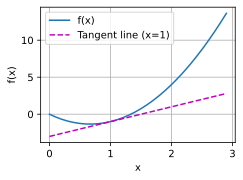

In [250]:
%matplotlib inline
from IPython import display
from d2l import tensorflow as d2l

def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    display.set_matplotlib_formats('svg')
    
# 我们定义set_figsize函数来设置图表大小。 注意，这里我们直接使用d2l.plt，因为导入语句 from matplotlib import pyplot as plt已标记为保存到d2l包中。
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    print(X)
    print(Y)
    if legend is None:
        legend = []
    print('legend:',legend)
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    print('axes:',axes)
    

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
        print('X has one axis:',X)
    if Y is None:
        X, Y = [[]] * len(X), X
        print('Y is none')
        print('X:',X)
        print('Y:',Y)
    elif has_one_axis(Y):
        Y = [Y]
        print('Y has one axis:',Y)
    if len(X) != len(Y):
        print('X Y长度不一致')
        print('X长度：',len(X))
        print('Y长度：',len(Y))
        X = X * len(Y)
        print('X长度扩为Y的长度：',X)
        
    axes.cla()
    print('=========')
    print('X=',X)
    print('Y=',Y)
    for x, y, fmt in zip(X, Y, fmts):
        print('x,y,fmt:',x,y,fmt)
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
    
    
# 现在我们可以绘制函数 𝑢=𝑓(𝑥) 及其在 𝑥=1 处的切线 𝑦=2𝑥−3 ， 其中系数 2 是切线的斜率。
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [251]:
f(0.1)

-0.37

In [210]:
hasattr(x, "ndim")

True

In [211]:
x.shape

(30,)

In [213]:
hasattr(np.array(1), "ndim")

True

In [216]:
x.ndim

1

In [217]:
isinstance(x, list)

False

In [218]:
hasattr(x[0], "__len__")

False

In [220]:
np.reshape(np.arange(12),(3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [221]:
np.reshape(np.arange(12),(3,4))[0]

array([0, 1, 2, 3])

In [222]:
hasattr(np.reshape(np.arange(12),(3,4))[0], "__len__")

True

In [227]:
0 and 1 or 0 and 1

0

In [228]:
x


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9])

In [229]:
[x]

[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9])]

In [230]:
len(x)

30

In [231]:
[[]]*30

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

#### 2.4.2 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。 在深度学习中，函数通常依赖于许多变量。 因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

设 𝑦=𝑓(𝑥1,𝑥2,…,𝑥𝑛) 是一个具有 𝑛 个变量的函数。  𝑦 关于第 𝑖 个参数 𝑥𝑖 的偏导数（partial derivative）为：

(2.4.7)
∂𝑦∂𝑥𝑖=limℎ→0𝑓(𝑥1,…,𝑥𝑖−1,𝑥𝑖+ℎ,𝑥𝑖+1,…,𝑥𝑛)−𝑓(𝑥1,…,𝑥𝑖,…,𝑥𝑛)ℎ.
 
为了计算 ∂𝑦∂𝑥𝑖 ， 我们可以简单地将 𝑥1,…,𝑥𝑖−1,𝑥𝑖+1,…,𝑥𝑛 看作常数， 并计算 𝑦 关于 𝑥𝑖 的导数。 对于偏导数的表示，以下是等价的：

(2.4.8)
∂𝑦∂𝑥𝑖=∂𝑓∂𝑥𝑖=𝑓𝑥𝑖=𝑓𝑖=𝐷𝑖𝑓=𝐷𝑥𝑖𝑓.

#### 2.4.3梯度
我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。 具体而言，设函数 𝑓:ℝ𝑛→ℝ 的输入是 一个 𝑛 维向量 𝐱=[𝑥1,𝑥2,…,𝑥𝑛]⊤ ，并且输出是一个标量。 函数 𝑓(𝐱) 相对于 𝐱 的梯度是一个包含 𝑛 个偏导数的向量:

(2.4.9)
∇𝐱𝑓(𝐱)=[∂𝑓(𝐱)∂𝑥1,∂𝑓(𝐱)∂𝑥2,…,∂𝑓(𝐱)∂𝑥𝑛]⊤,
 
其中 ∇𝐱𝑓(𝐱) 通常在没有歧义时被 ∇𝑓(𝐱) 取代。

假设 𝐱 为 𝑛 维向量，在微分多元函数时经常使用以下规则:

对于所有 𝐀∈ℝ𝑚×𝑛 ，都有 ∇𝐱𝐀𝐱=𝐀⊤ 

对于所有 𝐀∈ℝ𝑛×𝑚 ，都有 ∇𝐱𝐱⊤𝐀=𝐀 

对于所有 𝐀∈ℝ𝑛×𝑛 ，都有 ∇𝐱𝐱⊤𝐀𝐱=(𝐀+𝐀⊤)𝐱 

∇𝐱‖𝐱‖2=∇𝐱𝐱⊤𝐱=2𝐱 

同样，对于任何矩阵 𝐗 ，都有 ∇𝐗‖𝐗‖2𝐹=2𝐗 。 正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

#### 2.4.4链式法则
然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以我们可能没法应用上述任何规则来微分这些函数。 幸运的是，链式法则使我们能够微分复合函数。

让我们先考虑单变量函数。假设函数 𝑦=𝑓(𝑢) 和 𝑢=𝑔(𝑥) 都是可微的，根据链式法则：

(2.4.10)
𝑑𝑦𝑑𝑥=𝑑𝑦𝑑𝑢𝑑𝑢𝑑𝑥.
 
现在让我们把注意力转向一个更一般的场景，即函数具有任意数量的变量的情况。 假设可微分函数 𝑦 有变量 𝑢1,𝑢2,…,𝑢𝑚 ，其中每个可微分函数 𝑢𝑖 都有变量 𝑥1,𝑥2,…,𝑥𝑛 。 注意， 𝑦 是 𝑥1,𝑥2，…,𝑥𝑛 的函数。 对于任意 𝑖=1,2,…,𝑛 ，链式法则给出：

(2.4.11)¶
𝑑𝑦𝑑𝑥𝑖=𝑑𝑦𝑑𝑢1𝑑𝑢1𝑑𝑥𝑖+𝑑𝑦𝑑𝑢2𝑑𝑢2𝑑𝑥𝑖+⋯+𝑑𝑦𝑑𝑢𝑚𝑑𝑢𝑚𝑑𝑥𝑖

#### 2.4.5小结
* 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

* 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

* 链式法则使我们能够微分复合函数。

#### 2.4.6练习

* 绘制函数 𝑦=𝑓(𝑥)=𝑥^3−1/𝑥 和其在 𝑥=1 处切线的图像。

* 求函数 𝑓(𝐱)=3𝑥1^2+5𝑒^𝑥2 的梯度。

* 函数 𝑓(𝐱)=‖𝐱‖2 的梯度是什么？

* 你可以写出函数 𝑢=𝑓(𝑥,𝑦,𝑧) ，其中 𝑥=𝑥(𝑎,𝑏) ， 𝑦=𝑦(𝑎,𝑏) ， 𝑧=𝑧(𝑎,𝑏) 的链式法则吗?

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[array([       -inf, -9.999     , -4.992     , -3.30633333, -2.436     ,
       -1.875     , -1.45066667, -1.08557143, -0.738     , -0.38211111,
        0.        ,  0.42190909,  0.89466667,  1.42776923,  2.02971429,
        2.70833333,  3.471     ,  4.32476471,  5.27644444,  6.33268421,
        7.5       ,  8.78480952, 10.19345455, 11.73221739, 13.40733333,
       15.225     , 17.19138462, 19.31262963, 21.59485714, 24.04417241]), array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
        0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,
        4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6])]
legend: ['f(x)', 'Tangent line (x=1)']
axes: AxesSubplot(0.125,0.125;0.775x0.755)
X has one axis: [array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2

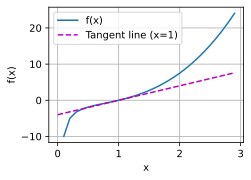

In [254]:
"""
练习一：
 求y对x求导得3x^2+1/(x^2),带入1得到切线斜率k=4
 设y=k*x+b,带入（1，0），k=4,得b=-4
 所以x=1点的切线函数为：4*x-4
"""
x = np.arange(0, 3, 0.1)
plot(x, [x**3-1/(x), 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [255]:
"""
练习二:
    由定义得，各分量的偏导组成的向量 [6*x1,5e^x2]

"""

'\n练习二:\n    由定义得，各分量的偏导组成的向量 [6*x1,5e^x2]\n\n'

## 2.5自动微分

正如我们在 2.4节中所说的那样，求导是几乎所有深度学习优化算法的关键步骤。 虽然求导的计算很简单，只需要一些基本的微积分。 但对于复杂的模型，手工进行更新是一件很痛苦的事情（而且经常容易出错）。

<font color='red'>深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据我们设计的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。</font>

#### 2.5.1例子
作为一个演示例子，假设我们想对函数 𝑦=2𝐱⊤𝐱 关于列向量 𝐱 求导。 首先，我们创建变量x并为其分配一个初始值。

In [269]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

在我们计算 𝑦 关于 𝐱 的梯度之前，我们需要一个地方来存储梯度。 重要的是，我们不会在每次对一个参数求导时都分配新的内存。 因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。 注意，一个标量函数关于向量 𝐱 的梯度是向量，并且与 𝐱 具有相同的形状。

In [270]:
x =tf.Variable(x)
x

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

现在让我们计算 𝑦 。

In [277]:
with tf.GradientTape() as t:
    y = 2*tf.tensordot(x,x,axes=1)
    print(y)
y

tf.Tensor(28.0, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。 接下来，我们通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [272]:
x_grad = t.gradient(y,x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

函数 𝑦=2𝐱⊤𝐱 关于 𝐱 的梯度应为 4𝐱 。 让我们快速验证这个梯度是否计算正确。

In [274]:
x_grad == 4 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

### 实际上直接根据定义求梯度，很容易得到梯度为4*[x1,x2,x3,x4]

#### 2.5.2非标量变量的反向传播
<font color='red'>刚才的函数求出来是个标量，梯度好计算 <font/>

当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当我们调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [276]:
with tf.GradientTape() as t:
    y = x * x
    print(y)
t.gradient(y, x)  # 等价于y=tf.reduce_sum(x*x)


tf.Tensor([0. 1. 4. 9.], shape=(4,), dtype=float32)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

#### 2.5.3分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，我们希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

在这里，我们可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [278]:
# 设置persistent=True来运行t.gradient多次
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x

x_grad = t.gradient(z, x)
x_grad == u

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [279]:
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [280]:
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

#### 2.5.4. Python控制流的梯度计算
使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [281]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度。

In [282]:
a = tf.Variable(tf.random.normal(shape=()))
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.0336889>

In [283]:
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d, a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=102400.0>

我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a。 因此，我们可以用d/a验证梯度是否正确。

In [284]:
d_grad == d / a


<tf.Tensor: shape=(), dtype=bool, numpy=True>

#### 2.5.5小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上。然后我们记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

### 2.6 概率

### 2.7查阅文档

#### 2.7.1查找模块中所有函数和类

In [286]:
print(dir(tf.random))

['Algorithm', 'Generator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'all_candidate_sampler', 'categorical', 'create_rng_state', 'experimental', 'fixed_unigram_candidate_sampler', 'gamma', 'get_global_generator', 'learned_unigram_candidate_sampler', 'log_uniform_candidate_sampler', 'normal', 'poisson', 'set_global_generator', 'set_seed', 'shuffle', 'stateless_binomial', 'stateless_categorical', 'stateless_gamma', 'stateless_normal', 'stateless_poisson', 'stateless_truncated_normal', 'stateless_uniform', 'truncated_normal', 'uniform', 'uniform_candidate_sampler']


通常，我们可以忽略以“__”（双下划线）开始和结束的函数（它们是Python中的特殊对象）， 或以单个“_”（单下划线）开始的函数（它们通常是内部函数）。 根据剩余的函数名或属性名，我们可能会猜测这个模块提供了各种生成随机数的方法， 包括从均匀分布（uniform）、正态分布（normal）和多项分布（multinomial）中采样。



#### 2.7.2. 查找特定函数和类的用法

In [287]:
help(tf.ones)

Help on function ones in module tensorflow.python.ops.array_ops:

ones(shape, dtype=tf.float32, name=None)
    Creates a tensor with all elements set to one (1).
    
    See also `tf.ones_like`.
    
    This operation returns a tensor of type `dtype` with shape `shape` and
    all elements set to one.
    
    >>> tf.ones([3, 4], tf.int32)
    <tf.Tensor: shape=(3, 4), dtype=int32, numpy=
    array([[1, 1, 1, 1],
           [1, 1, 1, 1],
           [1, 1, 1, 1]], dtype=int32)>
    
    Args:
      shape: A `list` of integers, a `tuple` of integers, or
        a 1-D `Tensor` of type `int32`.
      dtype: Optional DType of an element in the resulting `Tensor`. Default is
        `tf.float32`.
      name: Optional string. A name for the operation.
    
    Returns:
      A `Tensor` with all elements set to one (1).



#### 2.7.3查看API

In [288]:
list?

In [290]:
list??